# Periodiska Funktioner och Trigonometriska Polynom

## Inledning

En periodisk funktion är en funktion som upprepar sina värden i regelbundna intervall, kallade perioder. Matematiskt uttryckt:
$$
f(x + T) = f(x) \quad \text{för alla } x
$$
där $T > 0$ är perioden. Den minsta sådana $T$ kallas grundperioden.

De mest kända exemplen är de trigonometriska funktionerna:
$\sin(x)$, period $2\pi$
$\cos(x)$, period $2\pi$
$\tan(x)$, period $\pi $

Periodiska funktioner är centrala inom fourieranalys, signalbehandling, fysik och många andra områden.

## Trigonometriska Polynom

Ett trigonometriskt polynom av grad $N$ är (på trigonometrisk form) en linjärkombination av sinus- och cosinusfunktioner
$$
f(x) = a_0 + \sum_{n=1}^{N} \left( a_n \cos(nx) + b_n \sin(nx) \right).
$$
Detta är egentligen en Fourierapproximation av grad $N$. Genom att välja olika koefficienter $a_n, b_n$ kan vi approximera komplexa periodiska funktioner.

## Importera bibliotek

Se till att du har följande installerat:
```
pip install numpy matplotlib scipy pandas jupyter
```


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal


# Ställ in stil för plottar
plt.style.use('seaborn-v0_8')
# Inline plottar
%matplotlib inline


## Skapa x-värden (en period 0 till 2π)

In [3]:
x = np.linspace(0, 2*np.pi, 1000)

## Exempel 1: Enkel sinus och cosinus

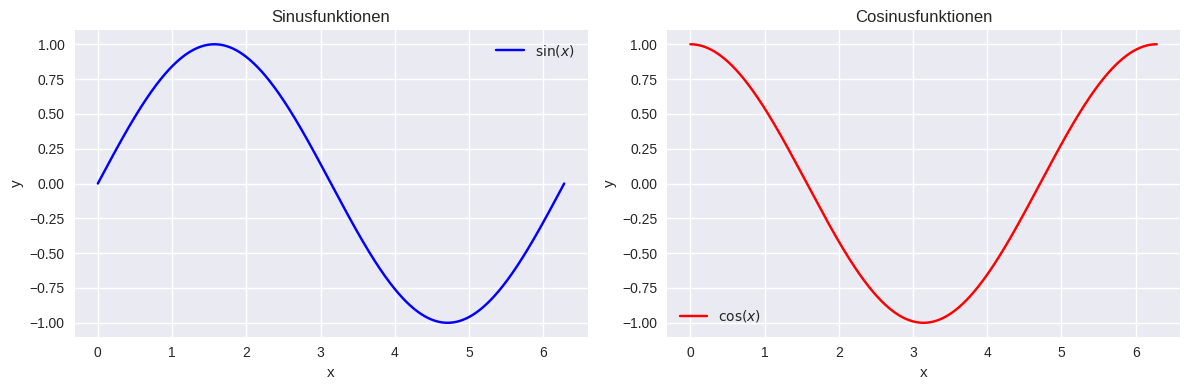

In [4]:
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y_sin, label=r'$\sin(x)$', color='blue')
plt.title('Sinusfunktionen')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y_cos, label=r'$\cos(x)$', color='red')
plt.title('Cosinusfunktionen')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Exempel 2: Trigonometriskt polynom — Fourierapproximation av en fyrkantvåg

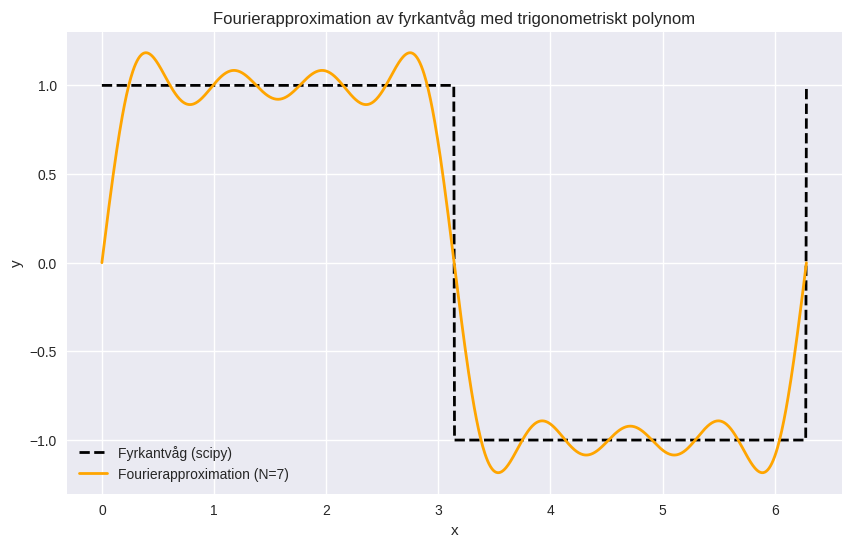

,x,Fyrkantvåg,Fourierapproximation
0,0.000000,1.0,0.000000
1,0.006289,1.0,0.032028
2,0.012579,1.0,0.064029
3,0.018868,1.0,0.095976
4,0.025158,1.0,0.127845
5,0.031447,1.0,0.159607
6,0.037737,1.0,0.191237
7,0.044026,1.0,0.222709
8,0.050316,1.0,0.253996
9,0.056605,1.0,0.285074


In [5]:
# Skapa en fyrkantvåg med scipy (period 2π)
y_square = signal.square(x)

# Skapa ett trigonometriskt polynom som approximerar fyrkantvågen
# Vi använder bara udda termer : sin(x), sin(3x)/3, sin(5x)/5, ...
N = 7  # antal termer
y_approx = np.zeros_like(x)

for n in range(1, N+1, 2):  # bara udda n
    y_approx += (4 / (np.pi * n)) * np.sin(n * x)

 # Skapa en DataFrame med pandas för att lagra resultaten
df = pd.DataFrame({
    'x': x,
    'Fyrkantvåg': y_square,
    'Fourierapproximation': y_approx
})

# Plotta
plt.figure(figsize=(10, 6))
plt.plot(x, df['Fyrkantvåg'], label='Fyrkantvåg (scipy)', linestyle='--', color='black', linewidth=2)
plt.plot(x, df['Fourierapproximation'], label=f'Fourierapproximation (N={N})', color='orange', linewidth=2)
plt.title('Fourierapproximation av fyrkantvåg med trigonometriskt polynom')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True) 
plt.show()

# Visa de första 10 raderna i datan
df.head(10)

## Exempel 3: Anpassat trigonometriskt polynom

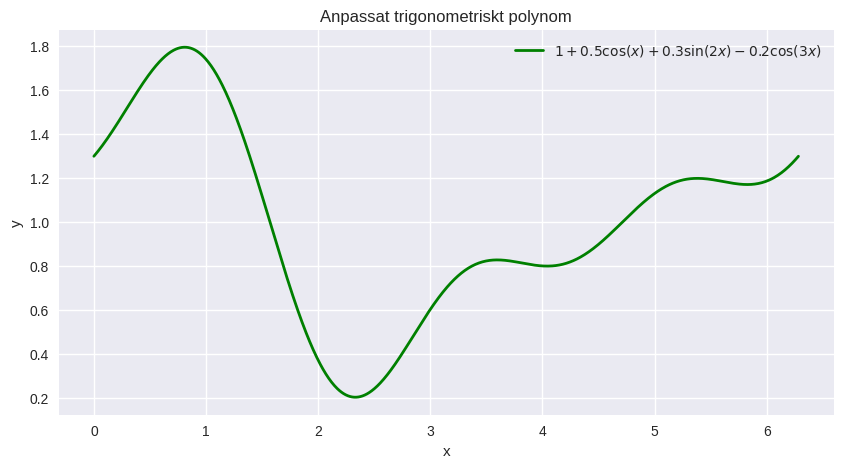

In [6]:
# Skapa ett eget trigonometriskt polynom:
# f(x) = 1 + 0.5*cos(x) + 0.3*sin(2x) - 0.2*cos(3x)

y_custom = 1 + 0.5 * np.cos(x) + 0.3 * np.sin(2*x) - 0.2 * np.cos(3*x)

df['Custom Polynomial'] = y_custom

plt.figure(figsize=(10, 5))
plt.plot(x, y_custom, label=r'$1 + 0.5\cos(x) + 0.3\sin(2x) - 0.2\cos(3x)$', color='green', linewidth=2)
plt.title('Anpassat trigonometriskt polynom')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Exempel 4: Jämför flera approximationer

In [ ]:
plt.figure(figsize=(12, 8))

# Plotta fyrkantvågen som referens
plt.plot(x, y_square, 'k--', label='Fyrkantvåg', linewidth=2)

# Testa olika antal termer
for N_terms in [1, 3, 7, 15]:
    y_temp = np.zeros_like(x)
    for n in range(1, N_terms+1, 2):
        y_temp += (4 / (np.pi * n)) * np.sin(n * x)
    plt.plot(x, y_temp, label=f'N = {N_terms}')

plt.title('Fourierapproximationer med olika antal termer')
plt.xlabel('x') 
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Sammanfattning

Med hjälp av trigonometriska polynom kan vi approximera nästan alla periodiska funktioner (under vissa matematiska villkor, t.ex. styckvis kontinuerliga funktioner). Ju fler termer vi inkluderar, desto bättre approximation — men vi kan också få oscillationer nära diskontinuiteter (**Gibbs fenomen**), vilket syns tydligt i fyrkantvågsapproximationen.

Pandas användes här för att strukturera våra data, matplotlib för visualisering, scipy för att generera en referensvågform, och numpy för beräkningarna.

Detta är grunden till **Fourierserier** — ett kraftfullt verktyg inom matematik och ingenjörsvetenskap.

# Övningar Lektion 1
- **Övning 1.1**: I exempel 2 ovan används bestäms fourierkoefficenterna till fyrkantsvågen med exakt räkning. Implementera med `np.mean(v)` en funktion `scp(f,g)` som implemenerar skalärprodukten där vi antar att `f` och `g` samplats över ett jämnt antal perioder.  Bestäm sedan fourierkoefficienterna med skalärproduktsfunktionen.
- **Övning 1.2**: Jämför en implementation av `scp` med `np.mean` (aritmetiskt medelvärde) och `np.trapz` (numerisk integration). Är skillnaden signifikant? 
- **Övning 1.3** : Försök skapa ett trigonometriskt polynom som approximerar en sågtandsvåg (`scipy.signal.sawtooth`). Jämför med N=4 och N=10 termer och plotta båda approximationerna tillsammans med fyrkantsvågen.

# Övningar Lektion 2
- **Övning 2.1**: Låt $D_N(t)=\sin((N+1/2)t)/\sin(t/2)$. Plotta $D_N$ över fyra perioder.
- **Övning 2.2**: Implementera faltning $f*g$ av två periodiska funktioner som har faltats över ett jämnt antal perioder. Falta sågtandsvågen med dirichletkärnan $D_N(t)$ för $N=4$ och $N=10$. 